# Minimal example with TensorFlow 2.0
in the notebook we will recreate our machine learning algorithm using TF2

## Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez("Tf_intro",inputs=generated_inputs,targets=generated_targets)
## np.savez saves an npz file, needs file name , then objects we want to save in file (label = array)
## tensor flow doesn't like file formats like excel or csv. 
## Need a tensor in tensorflow, so need a format to store information in tensors, solution is .npz files (numpy)
# NumPy's file type stores n-dimensional arrays.
# Tensors can be represented as n-dimensional arrays
## usually have data in specific file format, preprocess it, then save it as .npz file, 
## then build algorithm using npz file rather than original file

## Solving with Tensorflow

In [3]:
training_data = np.load("Tf_intro.npz")
## could have skipped, but good to get used to it as usually provided data in npz form

In [4]:
input_size = 2  ## 2 inputs, xs and zs
output_size = 1 

## we must build the model in TensorFlow, not like other packages

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval = -0.1,maxval = 0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval = -0.1,maxval = 0.1)) 
    ## min and max values for weights
    ## can specify other ways to initlaise weights and bias
    ## takes inputs provided to the model and calculates dot product of inputs
    ## and weights and adds bias, also applies activation function. Must specify output size in brackets
                            ])
## keras needed to build module, based on software now used in TF
## sequential is function that indicates we are laying down the model, containing layers included in algorithm. 
## uses inputs provides linear transformation and provides outputs. Linear combination + outputs = layers
## done data and model
## could add kernel (broad term for weight) initialiser and bias initilaiser 

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
##stoachastic gradient descent optimizer includes support for learning rate, momenetum, decay etc

model.compile(optimizer = custom_optimizer,loss='mean_squared_error')   
## configures model for training.
## Requires otpimisation algorithm and objective function (loss function) as arguments-  
## will use SGD (Stochastic Gradient Descent) for optimisation algorithm, generalised version of gradient descent 
## optimiser requires string value, need to be specific about what you type. Look at tf.keras.optimizers
## need to make loss function as close to l2 norm loss as possible, so need to use l2 norm loss / number of observations
## l2 norm loss = least sum of squares (least sum of squares error), scaled by obserations = average (mean)
## so mean_squared_error, affected a lot by outliers and puts outliers and squares them, not like huber loss function
## huber loss designated as huber_loss
## need to now indicate to model which data to fit, tensorflow has fit method.
## fit method fits(trains) the model. Needs to contain inputs and targets
## changed sgd now for custom optimizer, main difference is now we can set learning rate ourselves 
## can refer to tensorflow documentation on how to customise model 
##  setting customised loss function is harder than otpimization algorithm, but can be done if hooked on neural networks
## but adjusting loss (objective function) function is rarely worth the trouble 

model.fit(training_data['inputs'],training_data['targets'],epochs = 100,verbose = 2)
## epoch is an iteration over a full dataset, need to set number of iterations


Epoch 1/100
32/32 - 0s - loss: 27.8610 - 349ms/epoch - 11ms/step
Epoch 2/100
32/32 - 0s - loss: 1.3494 - 23ms/epoch - 722us/step
Epoch 3/100
32/32 - 0s - loss: 0.4457 - 19ms/epoch - 590us/step
Epoch 4/100
32/32 - 0s - loss: 0.4011 - 23ms/epoch - 705us/step
Epoch 5/100
32/32 - 0s - loss: 0.3948 - 22ms/epoch - 680us/step
Epoch 6/100
32/32 - 0s - loss: 0.3856 - 18ms/epoch - 565us/step
Epoch 7/100
32/32 - 0s - loss: 0.3681 - 21ms/epoch - 669us/step
Epoch 8/100
32/32 - 0s - loss: 0.3786 - 21ms/epoch - 654us/step
Epoch 9/100
32/32 - 0s - loss: 0.3580 - 17ms/epoch - 535us/step
Epoch 10/100
32/32 - 0s - loss: 0.3918 - 22ms/epoch - 676us/step
Epoch 11/100
32/32 - 0s - loss: 0.4068 - 22ms/epoch - 678us/step
Epoch 12/100
32/32 - 0s - loss: 0.3780 - 20ms/epoch - 635us/step
Epoch 13/100
32/32 - 0s - loss: 0.3727 - 17ms/epoch - 543us/step
Epoch 14/100
32/32 - 0s - loss: 0.3805 - 20ms/epoch - 618us/step
Epoch 15/100
32/32 - 0s - loss: 0.4084 - 23ms/epoch - 705us/step
Epoch 16/100
32/32 - 0s - loss: 0

In [5]:
## output says model has been trained and store as an object at that point in computer's memory
## verbose (silent) set to 0 means no output regarding training 
## verbose 1 = progress bar
## verbose 2 = one line per epoch 

In [6]:
## in real life, we won't know the formula used aka 2x-3z + 5 + noise, so won't know how model fared 

### Extract the weights and biases

In [7]:
## should be 2, 3 and 5

In [8]:
weights = model.layers[0].get_weights() [0] 
weights

## need to specify layer. Only layer is 1 so 0

array([[ 2.022152],
       [-3.031141]], dtype=float32)

In [9]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9837866], dtype=float32)

In [10]:
## model has found underlying relationship

### Extract the outputs (make predictions)

In [11]:
model.predict_on_batch(training_data['inputs']).round(1)  
## calulates outputs based on inputs, uses the data as argument, rounds inputs to 1 decimal place 

array([[-11.5],
       [ 16.1],
       [ -5. ],
       [  2.3],
       [ -2.4],
       [ 38.9],
       [ 47. ],
       [ -4.5],
       [ 23.8],
       [-19.4],
       [ -9.1],
       [-17.5],
       [ 16.5],
       [  1.2],
       [-10.3],
       [-24.5],
       [ -8. ],
       [ 19.1],
       [-20.2],
       [  0.4],
       [-16.5],
       [ 20.7],
       [ 14.2],
       [ 18.5],
       [  3.1],
       [ 33.6],
       [ -4.6],
       [ -1.3],
       [ 44.9],
       [-16.3],
       [ 47.3],
       [ 22. ],
       [ -1.3],
       [-12. ],
       [  7.9],
       [ 24. ],
       [ 45.6],
       [ -0.7],
       [ 23.3],
       [-21.3],
       [  4.5],
       [-10.7],
       [-21.9],
       [ 13.8],
       [ -5.2],
       [-20.4],
       [-25.9],
       [  3.7],
       [-37.9],
       [ 36.1],
       [ -1.3],
       [ 21.1],
       [ -2. ],
       [ 42.8],
       [ -6. ],
       [-11.3],
       [ 18.9],
       [-20.9],
       [ 43. ],
       [ 33. ],
       [ 45.4],
       [-32.8],
       [

In [12]:
## above values compared to targets to calculate loss function, based on 100 epochs,
## since outputs compared to targets at each epoch, good to compare randomely by rounding to 1dp

In [13]:
training_data['targets'].round(1)

array([[-12. ],
       [ 16.4],
       [ -4.7],
       [  2.1],
       [ -2.7],
       [ 38.4],
       [ 46.1],
       [ -5.1],
       [ 23.6],
       [-19. ],
       [ -9.9],
       [-17.7],
       [ 16.3],
       [  1.4],
       [-10.9],
       [-23.2],
       [ -7.4],
       [ 18.1],
       [-19.2],
       [ -0.3],
       [-16.6],
       [ 20. ],
       [ 13.2],
       [ 18.2],
       [  2.2],
       [ 32.9],
       [ -4.5],
       [ -0.3],
       [ 43.9],
       [-15.3],
       [ 47.1],
       [ 22. ],
       [ -0.5],
       [-11. ],
       [  7.8],
       [ 24.3],
       [ 44.7],
       [ -0.3],
       [ 23.5],
       [-21.4],
       [  4.9],
       [-10.3],
       [-21. ],
       [ 13.3],
       [ -4.4],
       [-20. ],
       [-25.3],
       [  4.1],
       [-36.5],
       [ 35.2],
       [ -1.7],
       [ 21.6],
       [ -1.9],
       [ 42.9],
       [ -5.2],
       [-11. ],
       [ 17.9],
       [-20.4],
       [ 41.9],
       [ 32. ],
       [ 45.5],
       [-32.8],
       [

### Plot the data

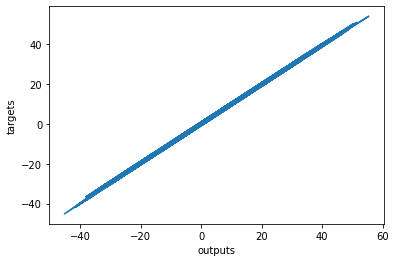

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
## should be close to 45 degree line, which it is